# mDC proportion analysis: Barplots to show number of upregulated and downregulated DEGs from NEBULA results on subtypes and celltypes
Figure 6B, Figure 6A

- Author: CW
- Files needed: mDC_proportion_analysis/3_NEBULA2_celltype_summaries + mDC_proportion_analysis/3_NEBULA_subtype_summaries 
- Last updated: 04/13/24

In [42]:
library(ggplot2)
library(ggpubr)
library(dplyr)
#library(ggrepel)

### set path to data 

In [1]:
path_to_res_ct <- '/home/cbw3/data/differential_gene_expression/mDC_analysis_109/NEBULA_reannotated_res/part2/volcano_df/'

In [2]:
path_to_res_st <- '/home/cbw3/data/differential_gene_expression/mDC_analysis_109/NEBULA_subtype_res/part1/volcano_df/'

In [3]:
#use the cutoffs that were used in the volcano plots -
padj_cutoff <- 0.05

## List of celltypes and subtypes 

In [4]:
reannotated_cell_types = c('Tumor', 'CD8 T', 'CD4 T','Other T' , 'Cycling T', 'NK', 'B', 
           'Monocyte/Macrophage', 'cDC', 'pDC', 'Mast','Endothelial', 'Fibroblast', 'Keratinocyte')

In [6]:
subtyped_cell_types <- c('Tumor - Cell Cycle - G1/S','Tumor - Cell Cycle - G2/M',
          'Tumor - Cell Cycle HMG-rich', 'Tumor - EMT-III', 'Tumor - Hypoxia',
          'Tumor - Interferon/MHC-II (I)','Tumor - MYC','Tumor - Protein maturation',
          'Tumor - Respiration','Tumor - Secreted I','Tumor - Skin-pigmentation',
          'Tumor - Stress','Tumor - Stress (in vitro)','Tumor - Translation initiation',
          'Tumor - Unassigned','Tumor - Unfolded protein response', 'Tumor - NA',
        'CD8 Tn','CD8 early activated Teff','CD8 HNRNPH1+ Teff','CD8 GZMK+ Teff',
          'CD8 Tem','CD8 Texme','CD8 Tex/HS','CD8 GNLY+ Tex','CD8 FTL+ Tex',
          'CD8 NKT','CD4 Tn','CD4 CD69+ T','CD4 Tm','CD4 Tex','CD4 Treg',
          'CD4 NKT','Monocyte classical','Monocyte non-classical','Macrophage M1',
          'Macrophage M2','Macrophage tumor-associated','DN NKT','other T','Naive B',
          'Transitional B','Memory B','Plasma B','NK','Cycling T','cDC1',
          'cDC2','mDC','pDC','Mast','Endothelial', 'Inflammatory fibroblast',
          'Myofibroblast','Keratinocyte')

## for celltypes

In [7]:
celltype <- c()
num_up <- c()
num_down <- c()

for(f in list.files(path_to_res_ct)) {
    
    #add file name to cell type
    celltype <- append(celltype, strsplit(f, '[.]')[[1]][1])
    
    df <- read.csv(paste0(path_to_res_ct, f), row.names = 'X')
    
    num_up <- append(num_up, dim(df[df$diffexpressed == 'UP',])[1])
    num_down <- append(num_down, dim(df[df$diffexpressed == 'DOWN',])[1])

}

#create dataframe for plotting
plot_df_ct_up <- data.frame(celltype = celltype, num_reg = num_up, direction = 'up')
plot_df_ct_down <- data.frame(celltype = celltype, num_reg = num_down, direction = 'down')

#concat 
plot_df_ct <- rbind(plot_df_ct_up, plot_df_ct_down)

In [8]:
#undo the underscores
plot_df_ct$celltype <- unlist(lapply(plot_df_ct$celltype, function(x) gsub('_', ' ', x)))
plot_df_ct[plot_df_ct$celltype == 'Monocyte Macrophage',]$celltype = 'Monocyte/Macrophage'

In [9]:
#order celltypes by a certain order 
plot_df_ct$celltype <- factor(plot_df_ct$celltype, levels = rev(reannotated_cell_types))

### Plot - Figure 6B

In [ ]:
#have in different direcitons 
plot_df_ct <- plot_df_ct %>%
  mutate(num_reg = ifelse(direction == "up",
                                 num_reg,
                                 -1*num_reg))

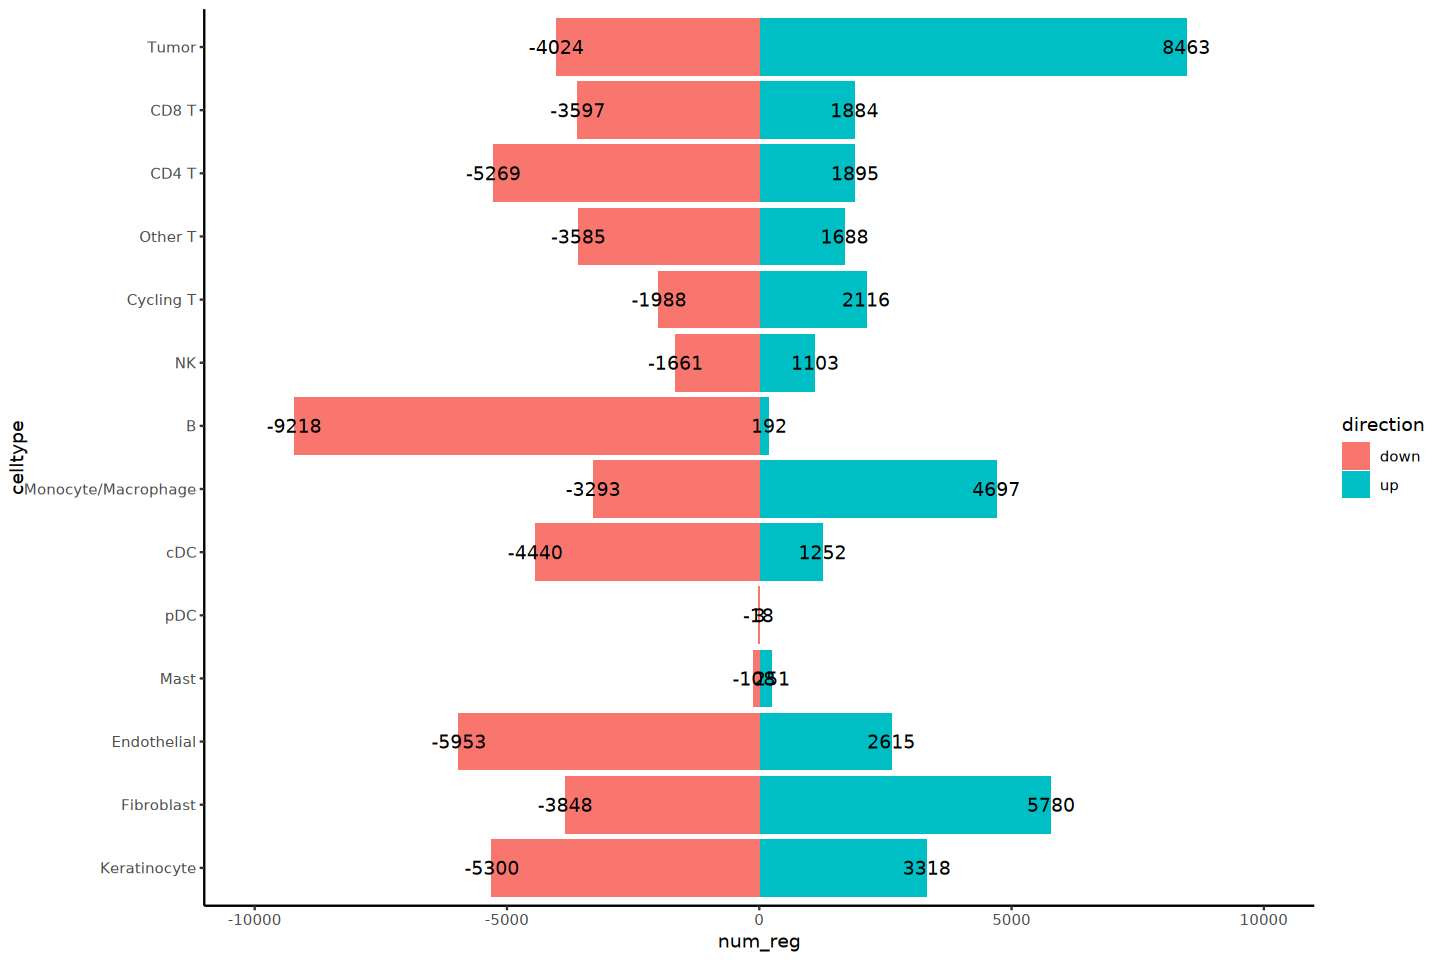

In [40]:
## plot divergent bars
options(repr.plot.height = 8, repr.plot.width = 12)
plot_df_ct %>%
  ggplot(aes(x = celltype, y = num_reg, fill = direction)) + 
  geom_bar(stat = "identity") + ylim(-10000, 10000) + geom_text(aes(label=num_reg)) + 
  coord_flip() + theme(panel.background = element_blank(), 
             axis.line = element_line(colour = "black"))

# panel.grid.major = element_blank(), panel.grid.minor = element_blank()

#ggsave('./F6B_NEBULA2_all_DEG_barplot.pdf', width = 11, height = 6)

## for subtypes

In [21]:
subtype <- c()
num_up <- c()
num_down <- c()

for(f in list.files(path_to_res_st)) {
    
    #add file name to cell type
    subtype <- append(subtype, strsplit(f, '[.]')[[1]][1])
    
    df <- read.csv(paste0(path_to_res_st, f), row.names = 'X')
    
    num_up <- append(num_up, dim(df[df$diffexpressed == 'UP',])[1])
    num_down <- append(num_down, dim(df[df$diffexpressed == 'DOWN',])[1])

}

#create dataframe for plotting
plot_df_st_up <- data.frame(subtype = subtype, num_reg = num_up, direction = 'up')
plot_df_st_down <- data.frame(subtype = subtype, num_reg = num_down, direction = 'down')

In [22]:
#concat 
plot_df_st <- rbind(plot_df_st_up, plot_df_st_down)

In [23]:
#replace characters 
plot_df_st$subtype <- unlist(lapply(plot_df_st$subtype, function(x) gsub('___', ' - ', x)))
plot_df_st$subtype <- unlist(lapply(plot_df_st$subtype, function(x) gsub('_', ' ', x)))

In [24]:
#plot_df_st
plot_df_st[plot_df_st$subtype == 'Monocyte non classical',]$subtype = 'Monocyte non-classical'
plot_df_st[plot_df_st$subtype == 'Macrophage tumor associated',]$subtype = 'Macrophage tumor-associated'

In [25]:
plot_df_st[plot_df_st$subtype == 'Tumor - Cell Cycle - G1 S',]$subtype = 'Tumor - Cell Cycle - G1/S'
plot_df_st[plot_df_st$subtype == 'Tumor - Cell Cycle - G2 M',]$subtype = 'Tumor - Cell Cycle - G2/M'
plot_df_st[plot_df_st$subtype == 'Tumor - Cell Cycle HMG rich',]$subtype = 'Tumor - Cell Cycle HMG-rich'
plot_df_st[plot_df_st$subtype == 'Tumor - Interferon MHC II (I)',]$subtype = 'Tumor - Interferon/MHC-II (I)'
plot_df_st[plot_df_st$subtype == 'Tumor - Skin pigmentation',]$subtype = 'Tumor - Skin-pigmentation'


plot_df_st[plot_df_st$subtype == 'CD8 Tex HS',]$subtype = 'CD8 Tex/HS'

In [68]:
unique(plot_df_st$subtype)

[1] "CD4 CD69+ T"                       "CD4 NKT"                          
 [3] "CD4 Tex"                           "CD4 Tm"                           
 [5] "CD4 Tn"                            "CD4 Treg"                         
 [7] "CD8 early activated Teff"          "CD8 FTL+ Tex"                     
 [9] "CD8 GNLY+ Tex"                     "CD8 GZMK+ Teff"                   
[11] "CD8 HNRNPH1+ Teff"                 "CD8 NKT"                          
[13] "CD8 Tem"                           "CD8 Tex/HS"                       
[15] "CD8 Texme"                         "CD8 Tn"                           
[17] "cDC1"                              "cDC2"                             
[19] "DN NKT"                            "Inflammatory fibroblast"          
[21] "Macrophage M1"                     "Macrophage M2"                    
[23] "Macrophage tumor-associated"       "mDC"                              
[25] "Memory B"                          "Monocyte classical"               
[27] "Monocyte non-classical"            "Myofibroblast"                    
[29] "Naive B"                           "not tumor"                        
[31] "other T"                           "Plasma B"                         
[33] "Transitional B"                    "Tumor - Cell Cycle - G1/S"        
[35] "Tumor - Cell Cycle - G2/M"         "Tumor - Cell Cycle HMG-rich"      
[37] "Tumor - Hypoxia"                   "Tumor - Interferon/MHC-II (I)"    
[39] "Tumor - NA"                        "Tumor - Protein maturation"       
[41] "Tumor - Respiration"               "Tumor - Skin-pigmentation"        
[43] "Tumor - Stress (in vitro)"         "Tumor - Stress"                   
[45] "Tumor - Translation initiation"    "Tumor - Unassigned"               
[47] "Tumor - Unfolded protein response"

In [26]:
filt_subtyped_cell_types <- intersect(subtyped_cell_types, unique(plot_df_st$subtype))

In [27]:
length(filt_subtyped_cell_types)

[1] 46

In [28]:
plot_df_st$subtype <- factor(plot_df_st$subtype, levels = rev(append(filt_subtyped_cell_types, 'not tumor')))

### Plot subtypes - Extended Figure 6B

In [29]:
plot_df_st <- plot_df_st %>% arrange(subtype)

In [30]:
#have in different direcitons 
plot_df_st <- plot_df_st %>%
  mutate(num_reg = ifelse(direction == "up",
                                 num_reg,
                                 -1*num_reg))

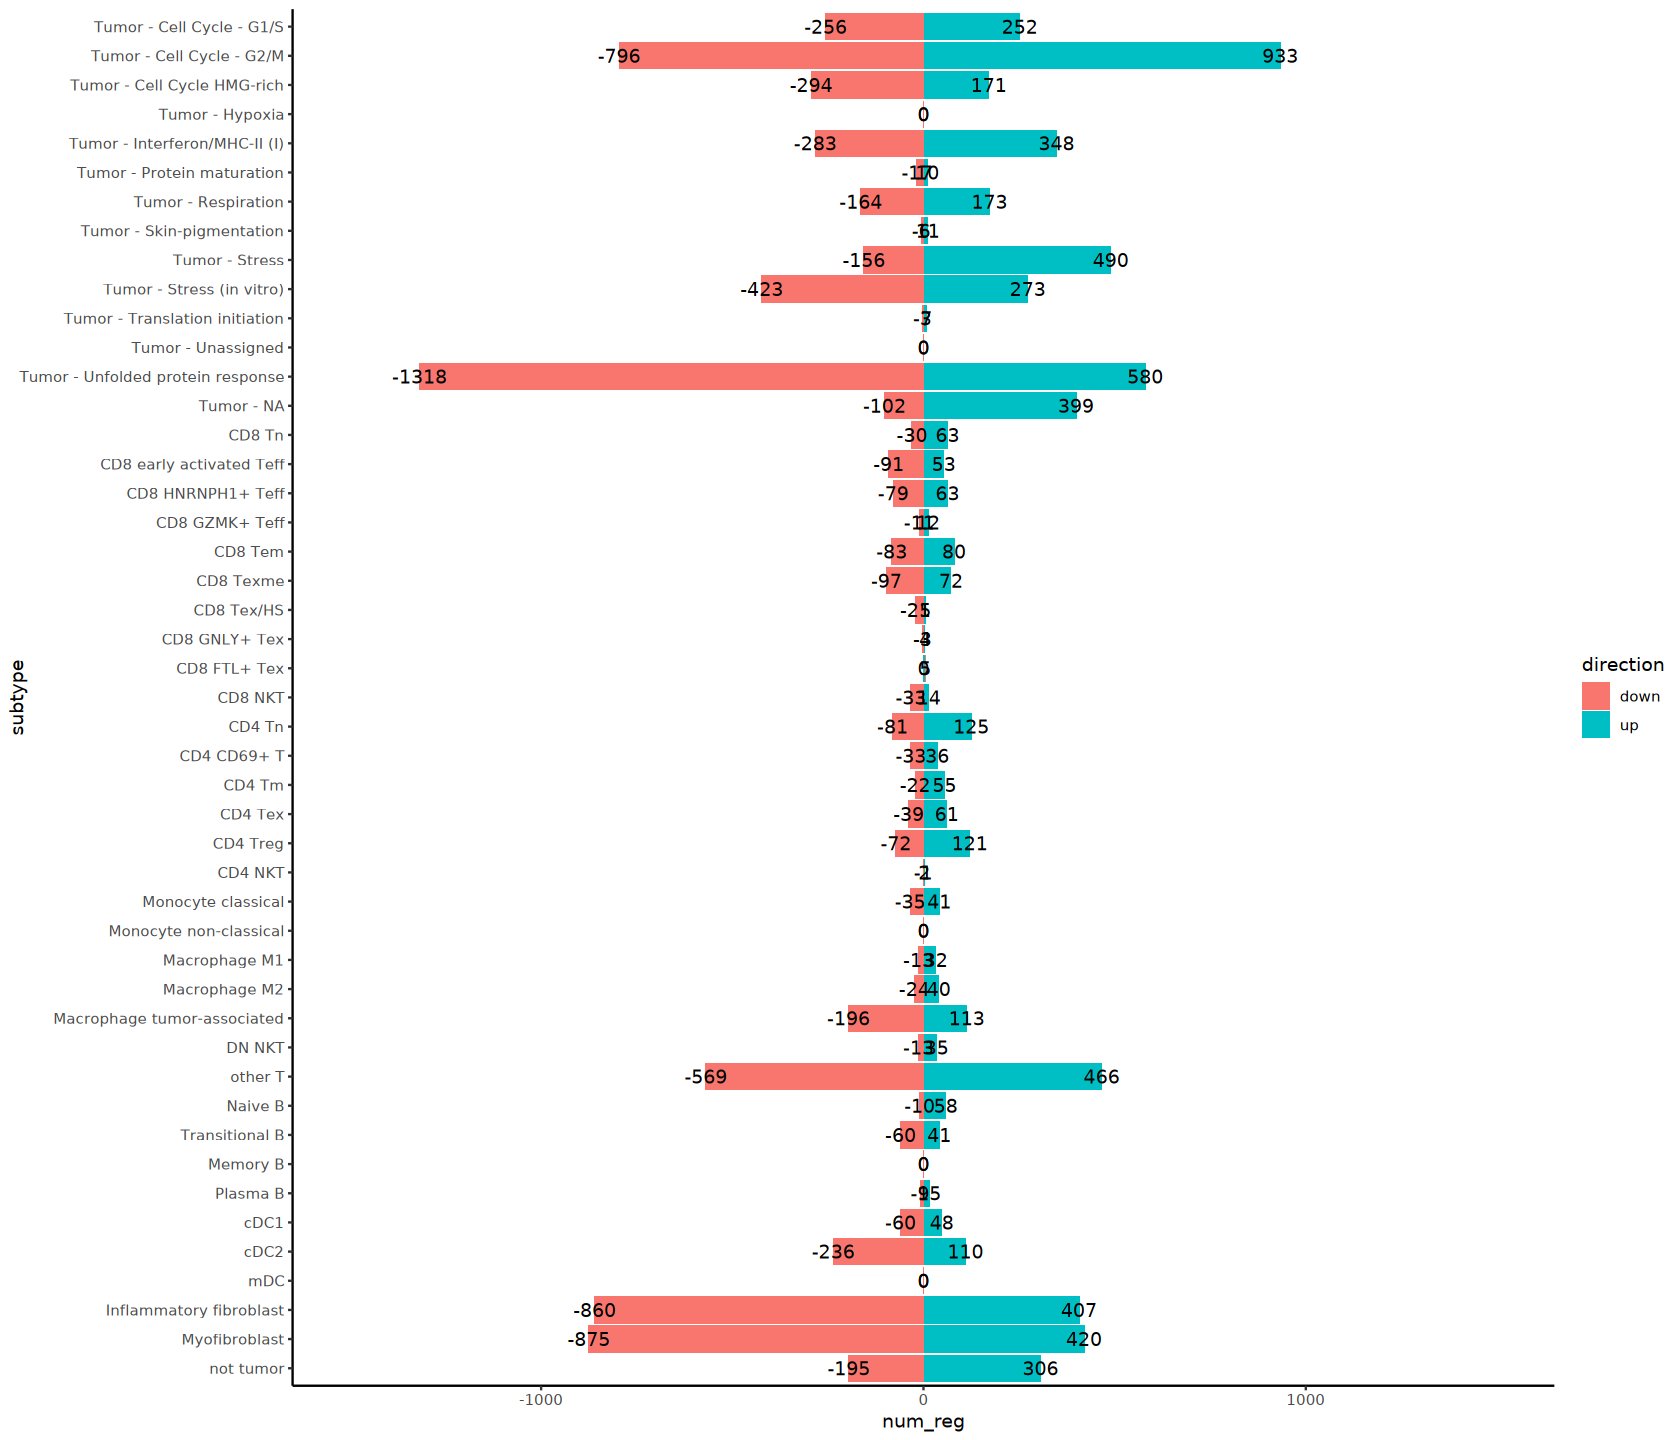

In [41]:
## plot divergent bars

options(repr.plot.height = 12, repr.plot.width = 14)
plot_df_st %>%
  ggplot(aes(x = subtype, y = num_reg, fill = direction))+
  geom_bar(stat = "identity") + ylim(-1500, 1500) + geom_text(aes(label=num_reg))+
theme(panel.background = element_blank(), 
             axis.line = element_line(colour = "black")) + 
  coord_flip() 

#ggsave('./ExtF6A_NEBULA2_all_DEG_barplot_subtypes_NEBULA1_vertical.pdf', width = 21, height = 8)

In [43]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggrepel_0.9.5 dplyr_1.1.4   ggpubr_0.6.0  ggplot2_3.5.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.12      pillar_1.9.0     compiler_4.2.3   base64enc_0.1-3 
 [5] tools_4.2.3      digest_0.6.35    uuid_1.2-0       jsonlite_1.8.8  
 [9] evaluate_0.23    lifecycl